In [4]:
from ferry_portfolio_pipeline.config.settings import CONFIG
import boto3
import pandas as pd
from io import StringIO


bucket = CONFIG["s3"]["bucket"]
input_key = CONFIG["s3"]["key"]
output_key = CONFIG["s3"]["output_key"]

s3 = boto3.client("s3")
obj = s3.get_object(Bucket=bucket, Key=input_key)
data = obj['Body'].read().decode('utf-8')
df = pd.read_csv(StringIO(data))


In [5]:
df = df.drop(columns=['_id'])

In [6]:
df

,Timestamp,Redemption Count,Sales Count
0,2025-07-15T12:00:00,225,225
1,2025-07-15T11:45:00,172,199
2,2025-07-15T11:30:00,231,208
3,2025-07-15T11:15:00,284,223
4,2025-07-15T11:00:00,217,179
...,...,...,...
249678,2015-05-04T16:00:00,0,2
249679,2015-05-01T16:00:00,1,0
249680,2015-05-01T15:45:00,0,1
249681,2015-05-01T15:15:00,0,2


In [7]:
df[['Year', 'Month', 'Day', 'Hour','Minute']] = pd.to_datetime(df['Timestamp']).apply(
    lambda x: pd.Series([x.year, x.month, x.day, x.hour , x.minute])
)

df['datetime'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour','Minute']])
df = df.set_index('datetime')



In [8]:
df = df.drop(columns=['Timestamp']) 

In [9]:
missing_values = df.isnull().sum()
duplicated_rows = df.duplicated().sum()

print("Missing values per column:\n", missing_values)
print("\nNumber of duplicated rows:", duplicated_rows)

Missing values per column:
 Redemption Count    0
Sales Count         0
Year                0
Month               0
Day                 0
Hour                0
Minute              0
dtype: int64

Number of duplicated rows: 0


In [10]:
df.head(10) 

,Redemption Count,Sales Count,Year,Month,Day,Hour,Minute
datetime,,,,,,,
2025-07-15 12:00:00,225,225,2025,7,15,12,0
2025-07-15 11:45:00,172,199,2025,7,15,11,45
2025-07-15 11:30:00,231,208,2025,7,15,11,30
2025-07-15 11:15:00,284,223,2025,7,15,11,15
2025-07-15 11:00:00,217,179,2025,7,15,11,0
2025-07-15 10:45:00,180,147,2025,7,15,10,45
2025-07-15 10:30:00,213,186,2025,7,15,10,30
2025-07-15 10:15:00,198,142,2025,7,15,10,15
2025-07-15 10:00:00,220,184,2025,7,15,10,0


In [11]:
df_2025 = df[df.index.year >= 2025]
df_2024 = df[df.index.year == 2024]
df_2023 = df[df.index.year == 2023]

In [15]:
df_2025

,Redemption Count,Sales Count,Year,Month,Day,Hour,Minute
datetime,,,,,,,
2025-07-15 12:00:00,225,225,2025,7,15,12,0
2025-07-15 11:45:00,172,199,2025,7,15,11,45
2025-07-15 11:30:00,231,208,2025,7,15,11,30
2025-07-15 11:15:00,284,223,2025,7,15,11,15
2025-07-15 11:00:00,217,179,2025,7,15,11,0
...,...,...,...,...,...,...,...
2025-01-01 07:00:00,2,2,2025,1,1,7,0
2025-01-01 06:45:00,0,2,2025,1,1,6,45
2025-01-01 06:30:00,3,3,2025,1,1,6,30


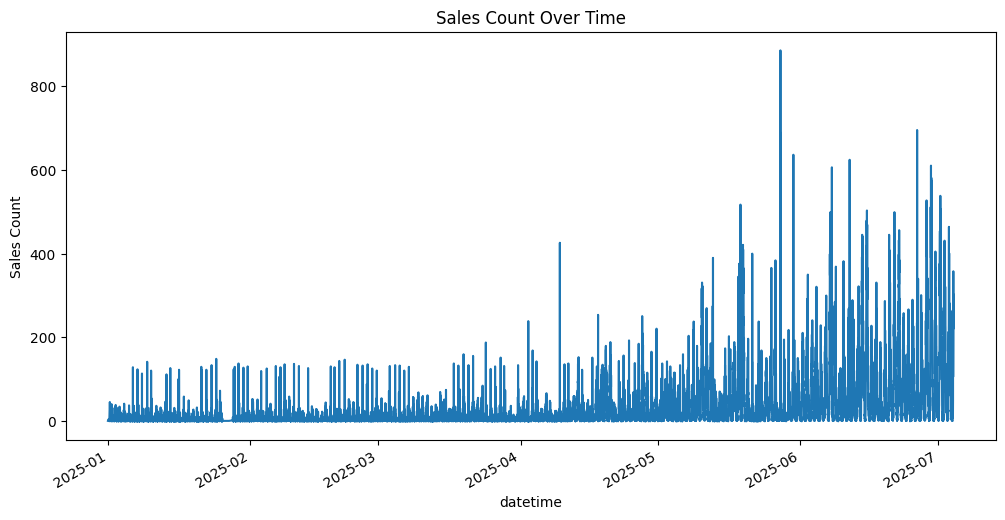

In [15]:
import matplotlib.pyplot as plt

df_2025['Sales Count'].plot(figsize=(12, 6), title='Sales Count Over Time')
plt.ylabel('Sales Count')
plt.show()

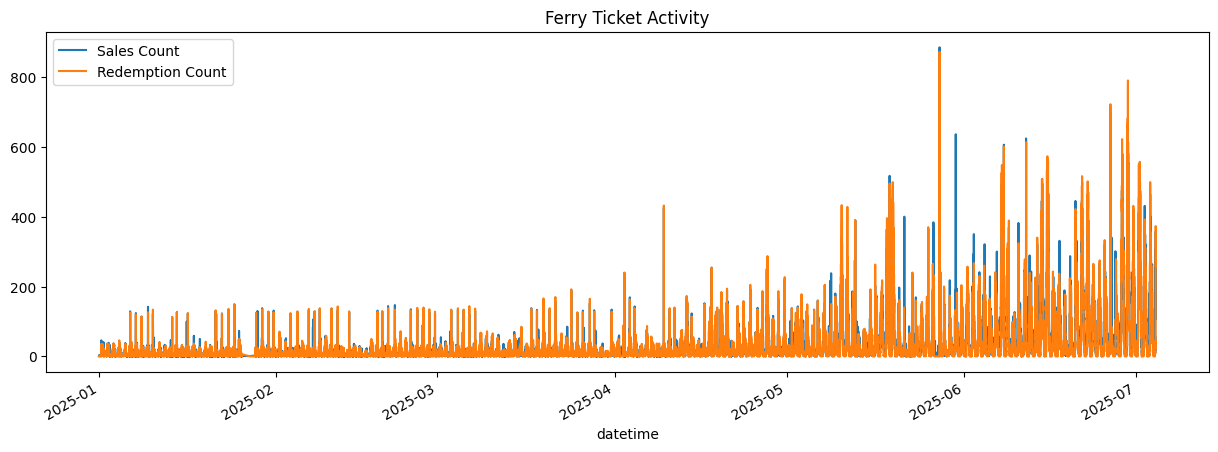

In [16]:
df_2025[['Sales Count', 'Redemption Count']].plot(figsize=(15, 5), title="Ferry Ticket Activity")
plt.show()


C:\Users\91812\AppData\Local\Temp\ipykernel_6424\2674267198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['hour'] = df_2025.index.hour


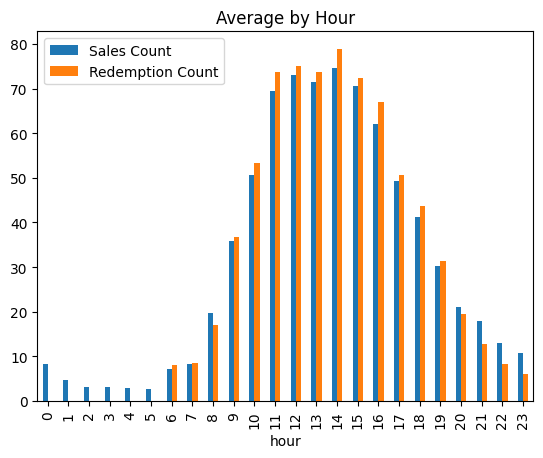

In [17]:
df_2025['hour'] = df_2025.index.hour
df_2025.groupby('hour')[['Sales Count', 'Redemption Count']].mean().plot(kind='bar', title="Average by Hour")
plt.show()


In [18]:
df_2024_2025 = df[df.index.year.isin([2024, 2025])]
df_2024_2025.head()

,Redemption Count,Sales Count,Year,Month,Day,Hour,Minute
datetime,,,,,,,
2025-07-04 09:45:00,258,222,2025,7,4,9,45
2025-07-04 09:30:00,373,358,2025,7,4,9,30
2025-07-04 09:15:00,182,245,2025,7,4,9,15
2025-07-04 09:00:00,115,114,2025,7,4,9,0
2025-07-04 08:45:00,21,117,2025,7,4,8,45


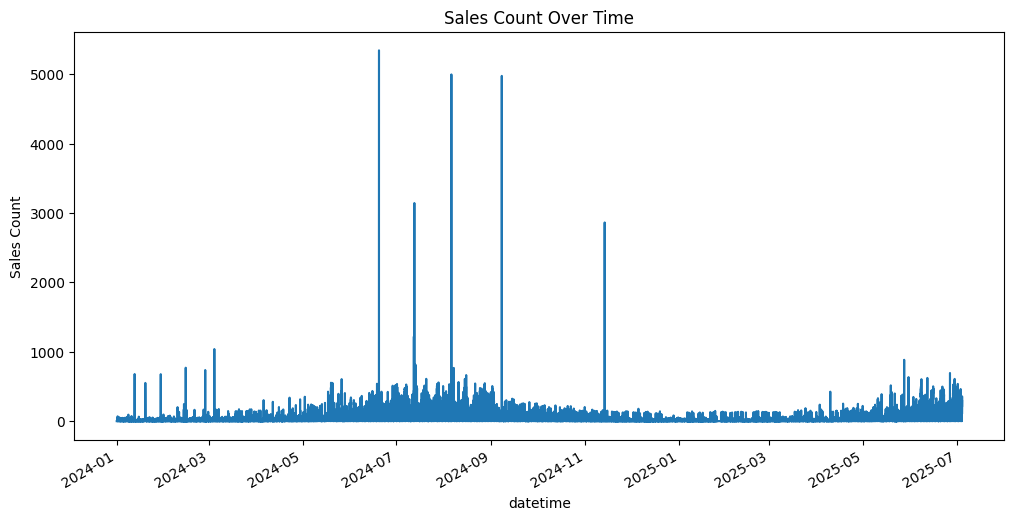

In [19]:
df_2024_2025['Sales Count'].plot(figsize=(12, 6), title='Sales Count Over Time')
plt.ylabel('Sales Count')
plt.show()

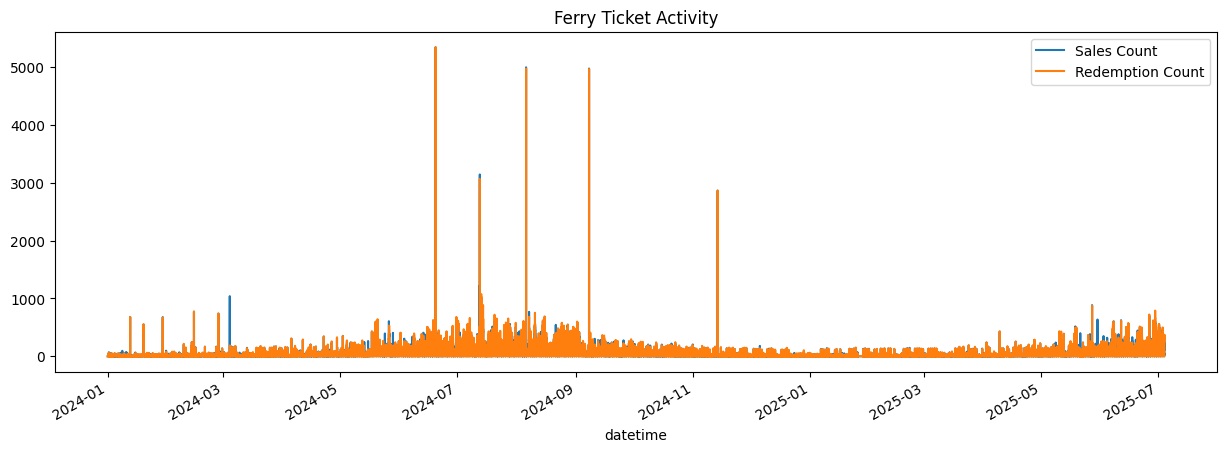

In [20]:
df_2024_2025[['Sales Count', 'Redemption Count']].plot(figsize=(15, 5), title="Ferry Ticket Activity")
plt.show()

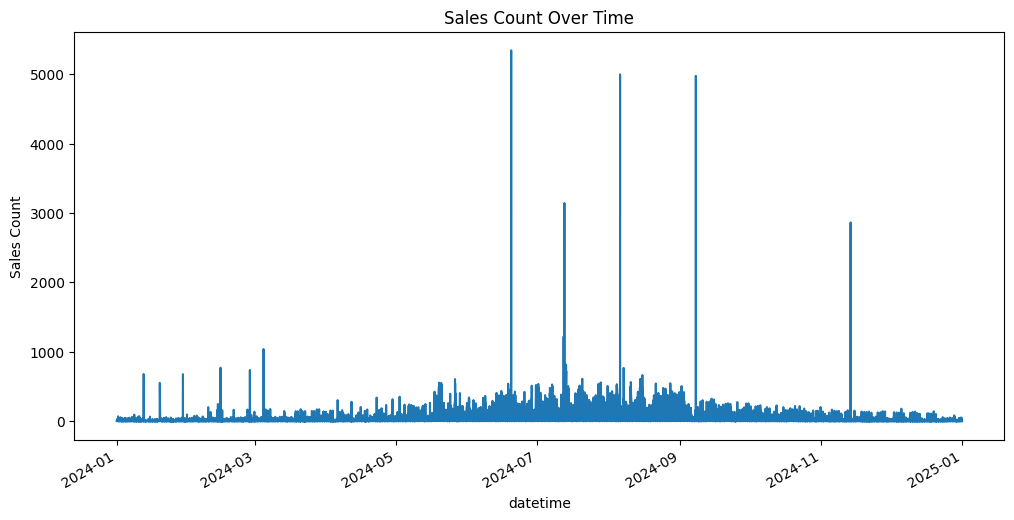

In [21]:
df_2024 = df[df.index.year == 2024]

df_2024['Sales Count'].plot(figsize=(12, 6), title='Sales Count Over Time')
plt.ylabel('Sales Count')
plt.show()

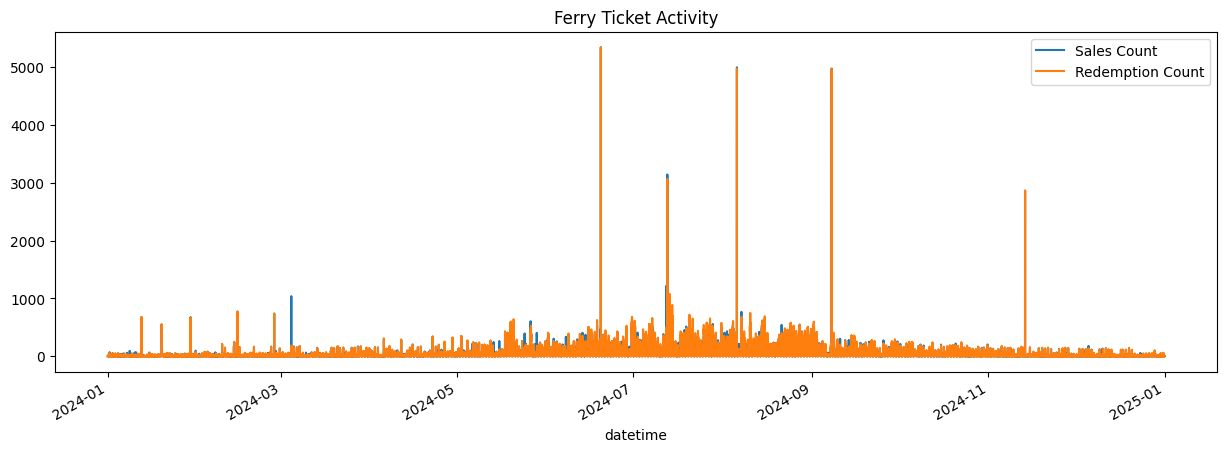

In [22]:
df_2024[['Sales Count', 'Redemption Count']].plot(figsize=(15, 5), title="Ferry Ticket Activity")
plt.show()

C:\Users\91812\AppData\Local\Temp\ipykernel_6424\1837208460.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2025['Month'] = df_2025.index.month


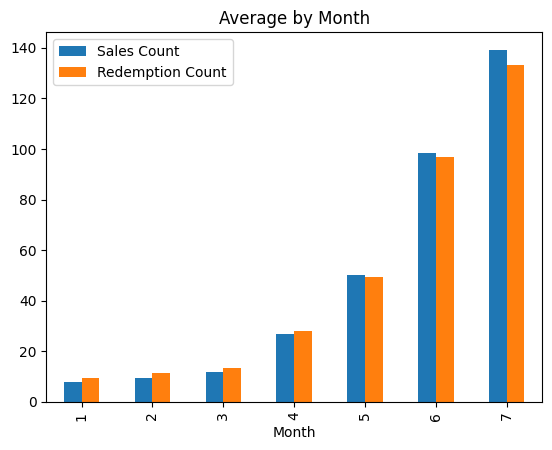

In [23]:
df_2025['Month'] = df_2025.index.month
df_2025.groupby('Month')[['Sales Count', 'Redemption Count']].mean().plot(kind='bar', title="Average by Month")
plt.show()


C:\Users\91812\AppData\Local\Temp\ipykernel_6424\97483507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Month'] = df_2024.index.month


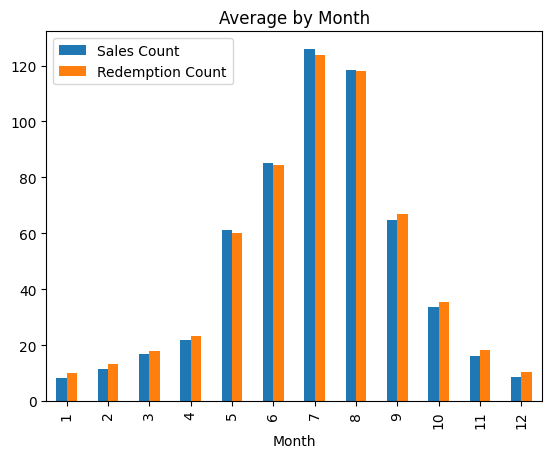

In [24]:
df_2024['Month'] = df_2024.index.month
df_2024.groupby('Month')[['Sales Count', 'Redemption Count']].mean().plot(kind='bar', title="Average by Month")
plt.show()

C:\Users\91812\AppData\Local\Temp\ipykernel_6424\1458076313.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['hour'] = df_2024.index.hour


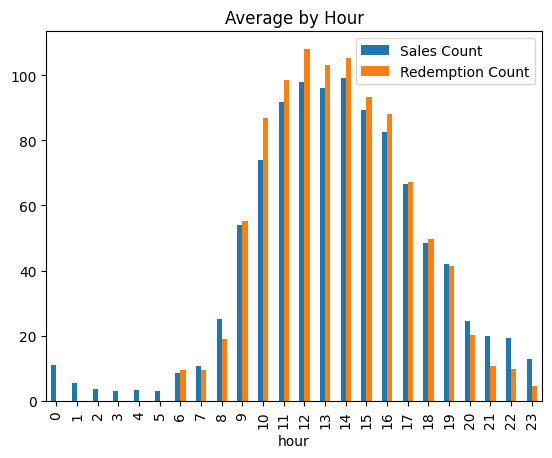

In [25]:
df_2024['hour'] = df_2024.index.hour
df_2024.groupby('hour')[['Sales Count', 'Redemption Count']].mean().plot(kind='bar', title="Average by Hour")
plt.show()


In [29]:
df = df.sort_index()
df_summer = df.loc[((df.index.year == 2024) | (df.index.year == 2025)) & 
                   (df.index.month >= 5) & (df.index.month <= 8)]

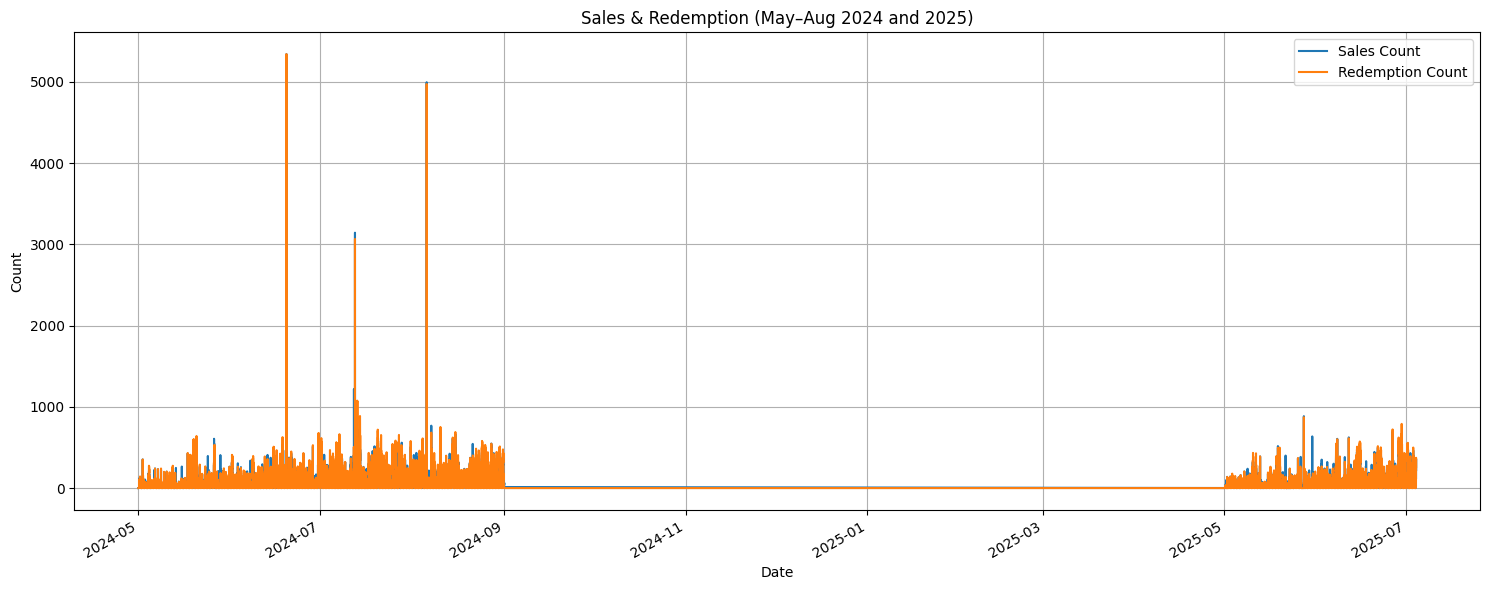

In [31]:
df_summer[['Sales Count', 'Redemption Count']].plot(
    figsize=(15, 6), title="Sales & Redemption (May–Aug 2024 and 2025)"
)
plt.xlabel("Date")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

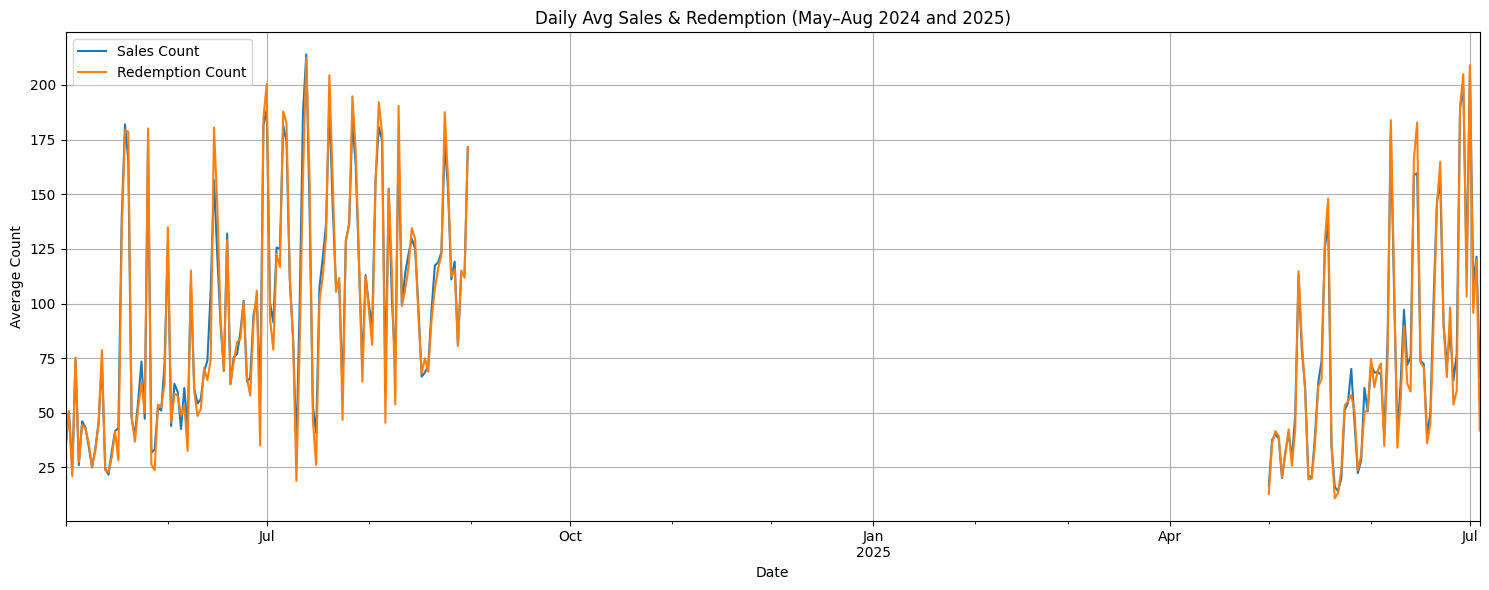

In [32]:
df_summer_daily = df_summer.resample('D').mean()

df_summer_daily[['Sales Count', 'Redemption Count']].plot(
    figsize=(15, 6), title="Daily Avg Sales & Redemption (May–Aug 2024 and 2025)"
)
plt.xlabel("Date")
plt.ylabel("Average Count")
plt.grid(True)
plt.tight_layout()
plt.show()


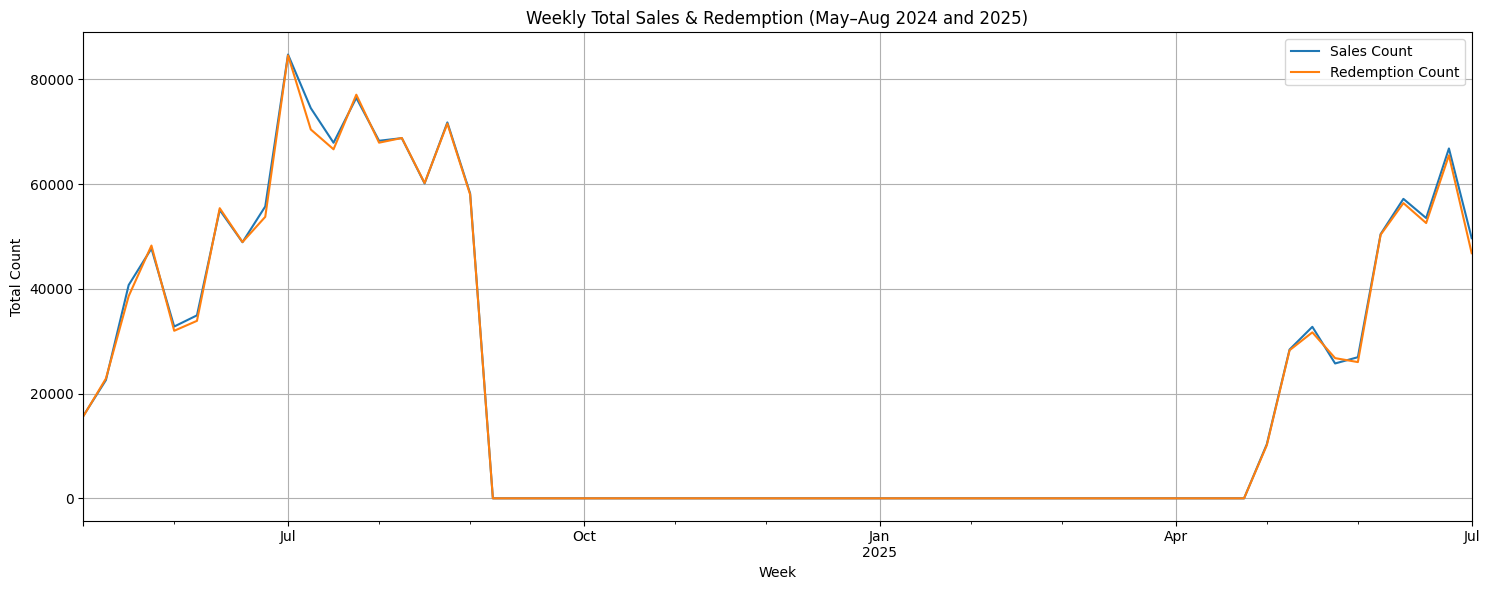

In [33]:
df_summer_weekly = df_summer.resample('W').sum()

df_summer_weekly[['Sales Count', 'Redemption Count']].plot(
    figsize=(15, 6), title="Weekly Total Sales & Redemption (May–Aug 2024 and 2025)"
)
plt.xlabel("Week")
plt.ylabel("Total Count")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\91812\AppData\Local\Temp\ipykernel_6424\1889671182.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_summer_weekly = df_summer.resample('M').sum()


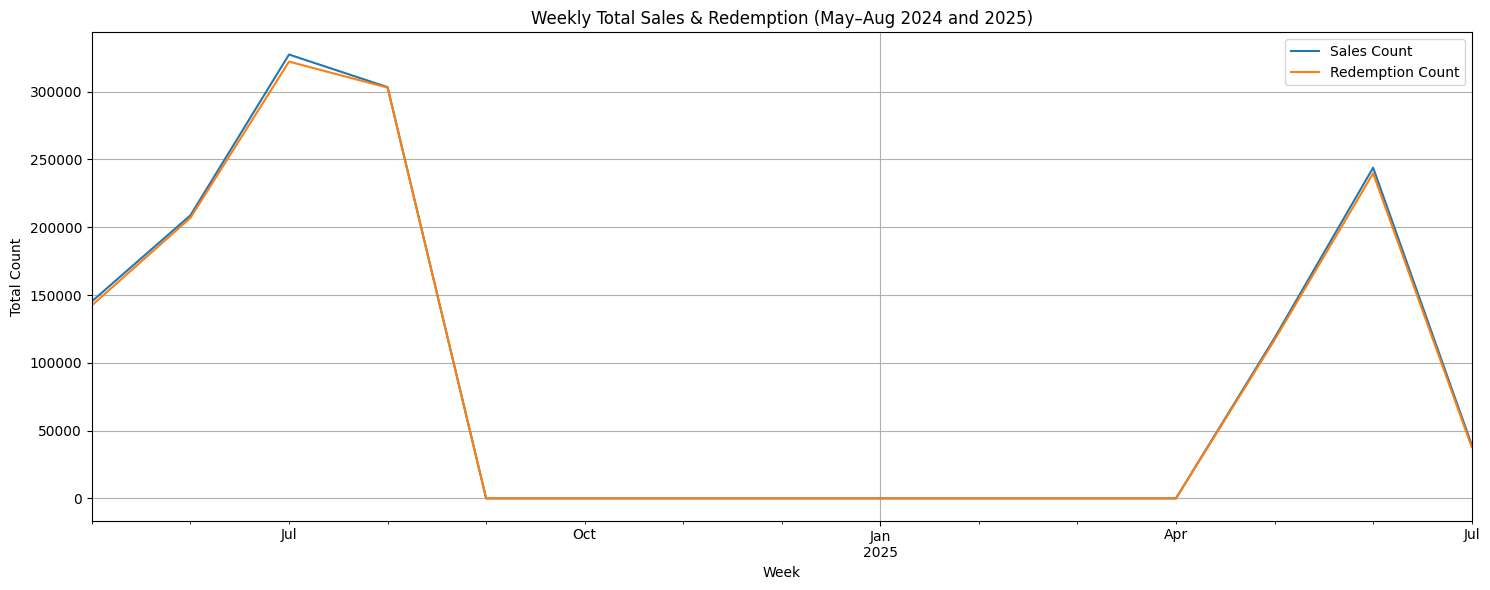

In [34]:
df_summer_weekly = df_summer.resample('M').sum()

df_summer_weekly[['Sales Count', 'Redemption Count']].plot(
    figsize=(15, 6), title="Weekly Total Sales & Redemption (May–Aug 2024 and 2025)"
)
plt.xlabel("Week")
plt.ylabel("Total Count")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\91812\AppData\Local\Temp\ipykernel_6424\2840314193.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_2024_hourly = df_2024_summer.resample('H').mean()
C:\Users\91812\AppData\Local\Temp\ipykernel_6424\2840314193.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_2025_hourly = df_2025_summer.resample('H').mean()


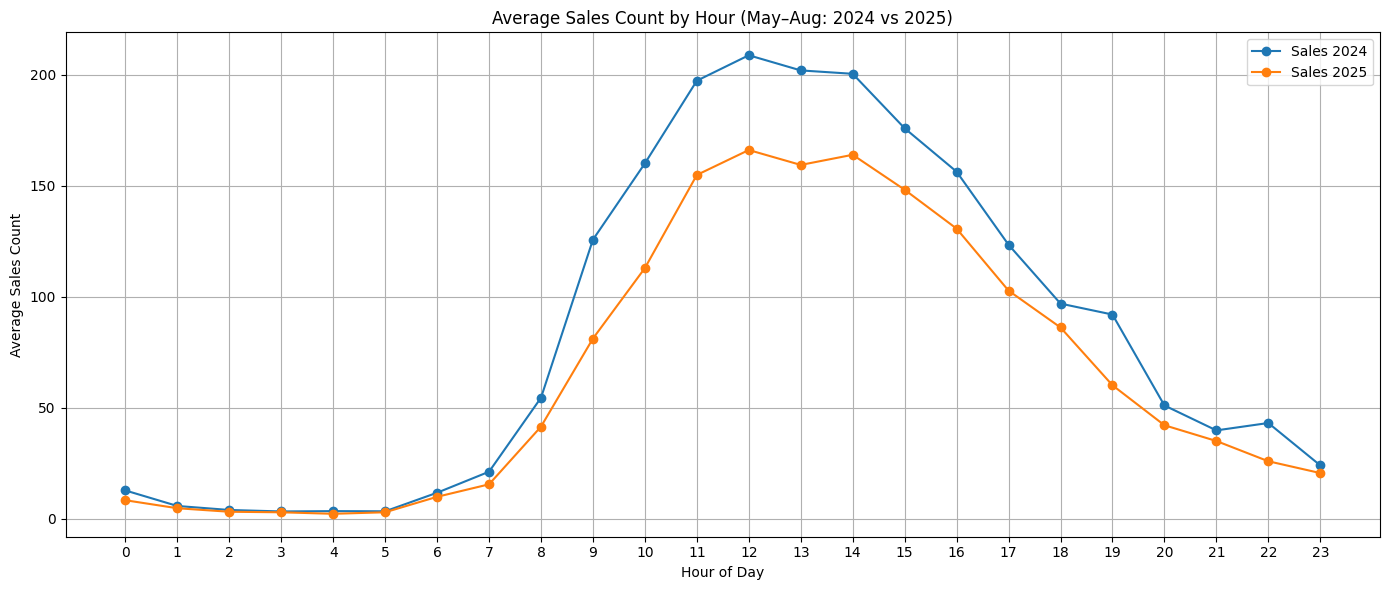

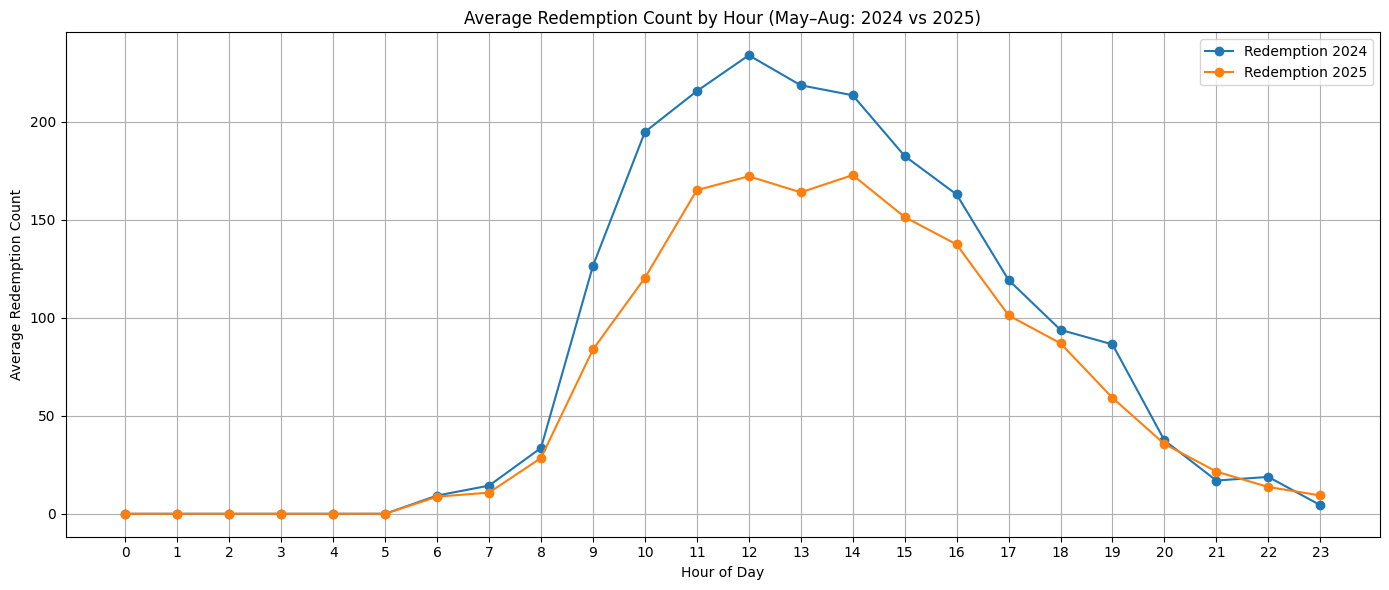

In [35]:
# Filter for May–August of 2024 and 2025 separately
df_2024_summer = df[(df.index.year == 2024) & (df.index.month >= 5) & (df.index.month <= 8)]
df_2025_summer = df[(df.index.year == 2025) & (df.index.month >= 5) & (df.index.month <= 8)]

# Resample to hourly and calculate mean
df_2024_hourly = df_2024_summer.resample('H').mean()
df_2025_hourly = df_2025_summer.resample('H').mean()

# Add hour column
df_2024_hourly['hour'] = df_2024_hourly.index.hour
df_2025_hourly['hour'] = df_2025_hourly.index.hour

# Group by hour to get average per hour of day
df_2024_avg = df_2024_hourly.groupby('hour')[['Sales Count', 'Redemption Count']].mean()
df_2025_avg = df_2025_hourly.groupby('hour')[['Sales Count', 'Redemption Count']].mean()

# Plot side-by-side line plots for Sales
plt.figure(figsize=(14,6))
plt.plot(df_2024_avg.index, df_2024_avg['Sales Count'], label='Sales 2024', marker='o')
plt.plot(df_2025_avg.index, df_2025_avg['Sales Count'], label='Sales 2025', marker='o')
plt.title("Average Sales Count by Hour (May–Aug: 2024 vs 2025)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Sales Count")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

# Plot side-by-side line plots for Redemption
plt.figure(figsize=(14,6))
plt.plot(df_2024_avg.index, df_2024_avg['Redemption Count'], label='Redemption 2024', marker='o')
plt.plot(df_2025_avg.index, df_2025_avg['Redemption Count'], label='Redemption 2025', marker='o')
plt.title("Average Redemption Count by Hour (May–Aug: 2024 vs 2025)")
plt.xlabel("Hour of Day")
plt.ylabel("Average Redemption Count")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()